In [1]:
import os
import time

import numpy as np
import pandas as pd

from ipywidgets import interact

import larch

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

os.chdir('..')
os.chdir('./catxas')
import catxas

#Timer to see how long it runs
t1 = time.time()

No conda env active, defaulting to base


# 1. Define where Data is Stored

In [2]:
### Modify paths inside the '' ###

# Folder containing ONLY CXAS spectra
data_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\Raw Data'

# Mass Spec File:
MS_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2View1.csv'

# AmP LabView File:
LV_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2.txt'

# 2. Define BL Data Structure

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
cxas_data_structure = {
    'time stamp': True,
    'time on line': 5, #Actually on line 6, indexed to 0
    'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'ADC_06', 'ADC_07', 'ADC_08'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_02', # I1
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'is QEXAFS': False
}

# 3. Create Experiment Class and Import  Data
## 3a. Create Experiment Class

In [4]:
# Create the Experimental Class
my_exp = catxas.Experiment("SnO2_H2Reduction")

# View keys created inside it
my_exp.__dict__.keys()

dict_keys(['name', 'process_params', 'spectra', 'analysis', 'summary'])

## 3b. Add BL Data

In [5]:
# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, cxas_data_structure)

20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0022
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0023
20210614_SnO2_H2_TPR_Sn_EXAFS_92.t

In [6]:
# Show that the spectra were added to the experiment
list(my_exp.spectra.keys())

['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92

In [7]:
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'
scan_name2 = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002'

In [8]:
# Check contents of single spectrum
my_exp.spectra[scan_name].keys()

dict_keys(['XAS Data Structure', 'Time', 'BL Data'])

In [9]:
# Check contents of single spectrum BL Data
my_exp.spectra[scan_name]['BL Data'].array_labels

['Encoder',
 'Energy',
 'ADC_01',
 'ADC_02',
 'ADC_03',
 'ADC_04',
 'ADC_05',
 'ADC_06',
 'ADC_07',
 'ADC_08']

In [10]:
# Check contents of single spectrum BL Data - Encoder
my_exp.spectra[scan_name]['BL Data'].Energy

array([29004.23526658, 29004.33861222, 29004.64865357, ...,
       30174.94229138, 30174.99824635, 30174.99824635])

In [11]:
# Organize Data to remove duplicate encover values
my_exp.organize_RawData(remove_duplicates=True, remove_nan_inf=False, remove_zeros=False) # remove_nan_inf & remove_zeros does not work yet

Duplicate data points removed
Range of data points per raw spectra: 4980-4980
Range of data points per duplicates removed spectra: 4838-4839


## 3c. Add Process Parameter Data 

In [12]:
# Add Mass Spec Dataset
my_exp.import_massspec(MS_filename)

# Add LabView Dataset
my_exp.import_labview(LV_filename)

# Display Keys of System
my_exp.process_params.keys()

dict_keys(['MS Data', 'LV Data'])

In [13]:
# Check contents of Mass Spec Data
my_exp.process_params['MS Data']

,H2,He,H2O,28,O2,Ar,CO2,T,Vac
Time,,,,,,,,,
2021-06-14 16:20:01,4.299990e-09,1.805990e-07,0.000000e+00,8.599980e-09,4.299990e-09,0.000004,4.299990e-09,26.6066,0.000002
2021-06-14 16:21:11,-2.687490e-09,1.807280e-07,3.364740e-09,9.406230e-09,7.395980e-09,0.000004,-6.664980e-10,26.8216,0.000002
2021-06-14 16:22:25,4.299990e-10,7.245480e-08,3.009990e-09,2.390790e-07,5.084740e-08,0.000004,2.149990e-10,26.8753,0.000002
2021-06-14 16:23:45,5.019160e-10,1.076100e-07,3.790010e-09,1.096490e-08,2.444970e-09,0.000004,6.912230e-11,26.6603,0.000002
2021-06-14 16:25:09,4.829750e-10,1.792020e-07,4.147460e-09,8.601270e-09,2.168300e-09,0.000004,4.668710e-11,26.4991,0.000002
...,...,...,...,...,...,...,...,...,...
2021-06-14 18:20:21,5.416910e-07,4.799540e-10,4.458250e-09,8.252680e-09,1.907100e-09,0.000004,6.298410e-11,34.4542,0.000002
2021-06-14 18:22:07,5.431960e-07,4.621950e-10,4.339750e-09,8.156480e-09,1.886550e-09,0.000004,7.524980e-11,32.7879,0.000002
2021-06-14 18:23:54,5.356710e-07,4.511440e-10,4.237500e-09,8.210780e-09,1.871380e-09,0.000004,7.626030e-11,31.4441,0.000002


In [14]:
# Check contents of Mass Spec Data
my_exp.process_params['LV Data']

,Stepnumber,T1 [°C],T2 [°C],T3 [°C],T4 [°C],P1 [psig],P2 [psig],P3 [psig],P4 [psig],P5 [psig],...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-14 16:21:03,0,2300.219119,2300.219119,2300.553746,2300.553746,38.706421,35.939952,41.897544,21.463028,33.594850,...,2300.219119,2300.553746,2300.553746,2300.553746,2300.394651,2300.394651,0,0,0,0
2021-06-14 16:21:33,0,2300.198863,2300.198863,2300.532837,2300.532837,38.687824,35.917171,41.890229,21.452139,33.594887,...,2300.198863,2300.532837,2300.532837,2300.532837,2300.374134,2300.374134,0,0,0,0
2021-06-14 16:21:48,0,2300.189610,2300.189610,2300.523607,2300.523607,38.695046,35.935024,41.893391,21.446253,33.595110,...,2300.189610,2300.523607,2300.523607,2300.523607,2300.364931,2300.364931,0,0,0,0
2021-06-14 16:22:03,0,2300.161798,2300.161798,2300.495868,2300.495868,38.687669,35.926842,41.884340,21.441242,33.594748,...,2300.161798,2300.495868,2300.495868,2300.495868,2300.336650,2300.336650,0,0,0,0
2021-06-14 16:22:18,0,2300.134546,2300.134546,2300.467706,2300.467706,38.721484,35.926780,41.883814,21.436323,33.594831,...,2300.134546,2300.467706,2300.467706,2300.467706,2300.309060,2300.309060,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14 18:32:03,0,2300.894228,2300.894228,2301.199352,2301.199352,38.343848,35.931987,41.292099,21.748877,33.595129,...,2300.894228,2301.199352,2301.199352,2301.199352,2301.064829,2301.064829,0,0,0,0
2021-06-14 18:32:18,0,2300.862918,2300.862918,2301.170420,2301.170420,38.394245,35.923742,41.314942,21.740043,33.595464,...,2300.862918,2301.170420,2301.170420,2301.170420,2301.035148,2301.035148,0,0,0,0
2021-06-14 18:32:33,0,2300.885955,2300.885955,2301.195606,2301.195606,38.439311,35.921294,41.329540,21.731563,33.594859,...,2300.885955,2301.195606,2301.195606,2301.195606,2301.059272,2301.059272,0,0,0,0


# 4. Correlate Process Paramters to X-ray Spectra Timestamps
## 4a. Correlate Parameters

In [15]:
# Correlate Process Params
my_exp.correlate_process_params()

# View Correlation Table
my_exp.summary['XAS Spectra Process Params']

,File Name,TOS [s],H2,He,H2O,28,O2,Ar,CO2,T,...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-14 16:33:52,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,0.0,4.929417e-10,1.810452e-07,6.951219e-09,8.664734e-09,2.471646e-09,0.000004,7.719114e-11,26.120772,...,2300.190768,2300.464815,2300.464815,2300.464815,2300.343342,2300.343342,0.0,0.0,0.0,0.0
2021-06-14 16:35:37,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,105.0,4.931230e-10,1.827490e-07,6.926960e-09,8.628440e-09,2.426090e-09,0.000004,7.898010e-11,25.907800,...,2300.228154,2300.499174,2300.499174,2300.499174,2300.378966,2300.378966,0.0,0.0,0.0,0.0
2021-06-14 16:37:23,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,211.0,4.713019e-10,1.821100e-07,6.798056e-09,8.669651e-09,2.461149e-09,0.000004,7.286727e-11,26.067593,...,2300.241883,2300.510800,2300.510800,2300.510800,2300.391108,2300.391108,0.0,0.0,0.0,0.0
2021-06-14 16:39:11,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,319.0,4.056493e-09,1.949101e-07,7.054554e-09,9.396570e-09,1.122279e-08,0.000004,1.175604e-10,26.068597,...,2300.262552,2300.529460,2300.529460,2300.529460,2300.409950,2300.409950,0.0,0.0,0.0,0.0
2021-06-14 16:40:57,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,425.0,1.128710e-08,1.397490e-08,7.368780e-09,8.759550e-09,4.797820e-09,0.000004,9.577160e-11,26.015300,...,2300.294947,2300.559966,2300.559966,2300.559966,2300.440447,2300.440447,0.0,0.0,0.0,0.0
2021-06-14 16:42:42,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,530.0,1.628722e-08,7.763893e-09,7.012374e-09,8.508112e-09,3.144702e-09,0.000004,1.011230e-10,25.964397,...,2300.302634,2300.566300,2300.566300,2300.566300,2300.444244,2300.444244,0.0,0.0,0.0,0.0
2021-06-14 16:44:27,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,635.0,1.677209e-07,6.677977e-09,6.732073e-09,8.423802e-09,2.903965e-09,0.000004,9.577366e-11,26.007782,...,2300.321962,2300.584995,2300.584995,2300.584995,2300.463512,2300.463512,0.0,0.0,0.0,0.0
2021-06-14 16:46:13,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,741.0,5.390002e-07,6.013107e-09,6.438386e-09,8.409555e-09,2.787266e-09,0.000004,8.044948e-11,25.961600,...,2300.348302,2300.611476,2300.611476,2300.611476,2300.491137,2300.491137,0.0,0.0,0.0,0.0
2021-06-14 16:47:59,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,847.0,5.453353e-07,5.441864e-09,6.127758e-09,8.365563e-09,2.705257e-09,0.000004,8.813759e-11,26.992001,...,2300.356767,2300.619987,2300.619987,2300.619987,2300.500101,2300.500101,0.0,0.0,0.0,0.0


## 4b. Save Correlation Table

In [16]:
# Save Process paramters:

# Define path and filename to save Correlated Process Parameters:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'

# Save the Values
my_exp.save_processparams(output_dir)

Process Parameter Data Saved


# 5. Calcualte Absorption Spectra [Sample and/or Reference]

In [17]:
# Calculates the absoprtion spectra of the sample and the reference 
my_exp.calculate_spectra(sample_spectra = True, ref_spectra = True)

In [18]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample'].name

'20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

In [19]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference'].name

'20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001_ref'

(29150.0, 29300.0)

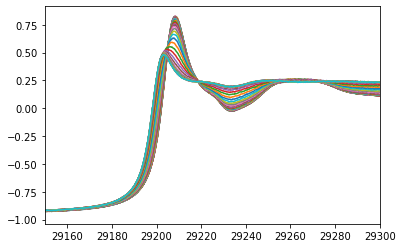

In [20]:
# Quick Visualization of Raw Data
xmin = 29150 # Energy Min for plotting
xmax = 29300 # Energy Min for plotting

spec_name = 'mu Sample' #'mu Reference'

for key in my_exp.spectra.keys():
    x = my_exp.spectra[key]['Absorption Spectra'][spec_name].energy
    y = my_exp.spectra[key]['Absorption Spectra'][spec_name].mu
    plt.plot(x,y)
    
    
plt.xlim([xmin, xmax])

# 6. Calibrate Spectra
## 6a. Calibrate Reference Spectra

Reference Calibraiton Statistics:
Reference E0 min: 29197.43 eV
Reference E0 max: 29200.21 eV
Reference E0 mean: 29198.84 +/- 0.58 eV
Reference E0 calibrated to: 29200.00 eV
Spectra shifted by 1.16 eV




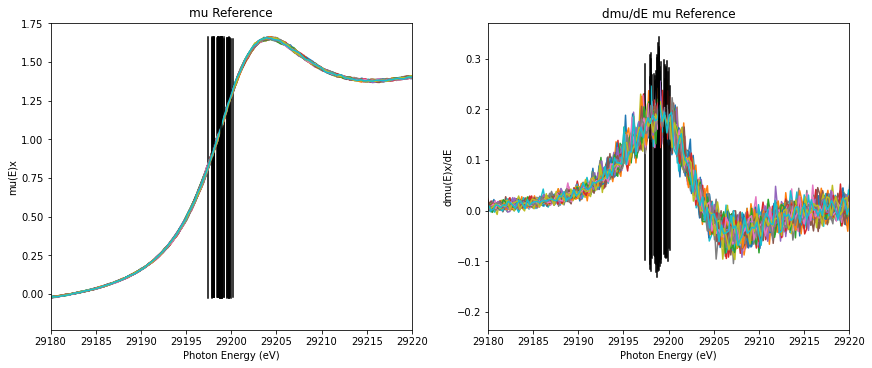

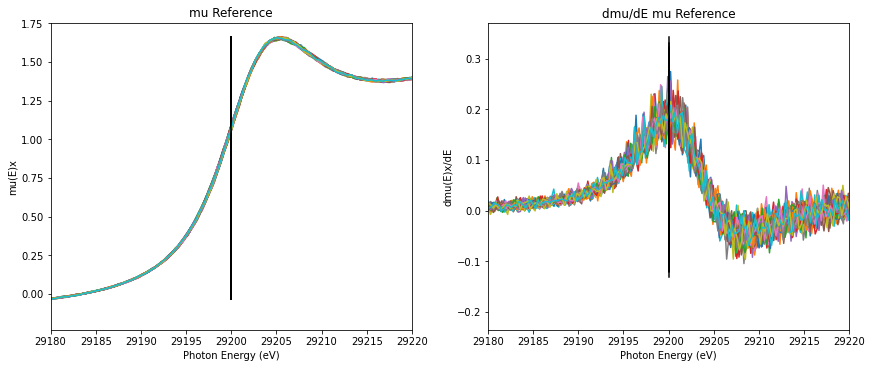

In [21]:
#Reference Calibration Energy

#### add functional to calibrate each spectra separately
Ref_E0 = 29200

my_exp.calibrate_reference_spectra(Ref_E0, use_mean = True)

## 6b. Calculate Sample E0

Sample Calibraiton Statistics:
Sample E0 min: 29199.02 eV
Sample E0 max: 29205.77 eV
Sample E0 mean: 29202.71 +/- 2.43 eV
Sample E0 set to: 29202.71 eV




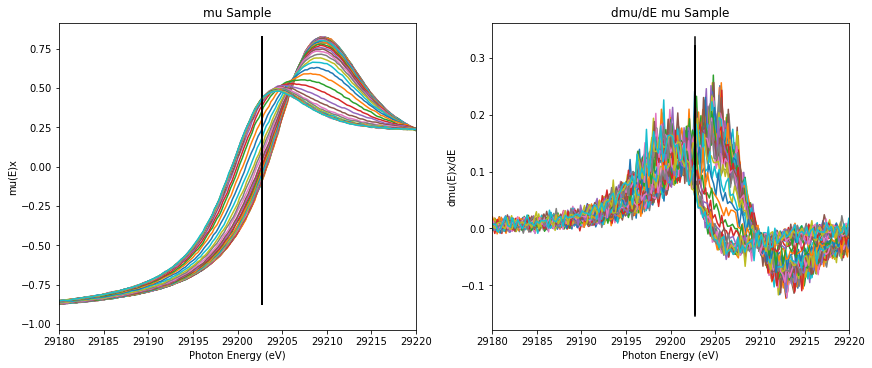

In [22]:
#Approximate edge of the Sample and determine approxiamte edge position
Samp_E0 = 29200
my_exp.find_sample_e0(Samp_E0)

In [23]:
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str
del_E,float64
e0,float64


# 7. Normalize Spectra
## 7a. Define normalization paramaters (can be separate for reference channel)

In [24]:
#Normalization paramters, references to E0
pre1 = -200
pre2 = -100
norm1 = 75
norm2 = 1000
nnorm = 2
make_flat = True

## 7b. Store normalization parameters into each spectrum

In [25]:
my_exp.set_normalization_parameters('mu Reference', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)

my_exp.set_normalization_parameters('mu Sample', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)



## 7c. Normalize and visualize spectra

In [26]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

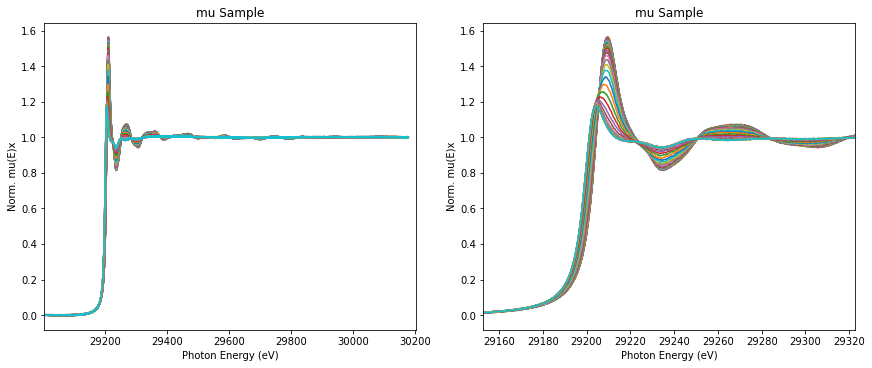

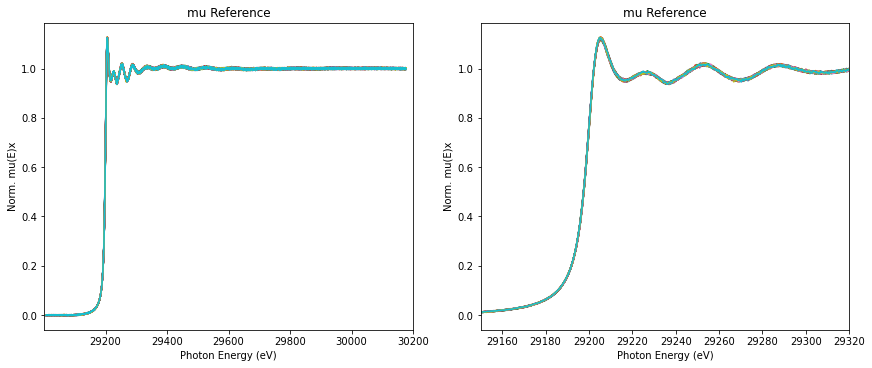

In [27]:
# Visualization of Normalized Spectra
my_exp.plot_norm_spectra(spectra = 'mu Sample')
my_exp.plot_norm_spectra(spectra = 'mu Reference')

# 8. Interpolation of XANES Spectra
## 8a. Determining how to interpolate XAS Structure

In [28]:
df = my_exp.check_Energy_Range()

Variation in starting energy points between spectra [eV]: 29005.399-29005.916
Variation in ending energy points between spectra [eV]: 30176.162-30176.610
Variation in step size of energy points between spectra [eV]: 0.242-0.242


In [29]:
# Visualize parameters for each spectra
df

,E_min,E_max,Min_E_Step,Max_E_Step,Mean_E_Step,STD_E_Step
0,29005.399023,30176.162003,0.055952,0.364590,0.241993,0.034633
1,29005.812410,30176.609650,0.055954,0.365132,0.242050,0.034437
2,29005.709062,30176.553693,0.055954,0.365202,0.242060,0.034601
3,29005.657389,30176.441781,0.055953,0.365273,0.242048,0.034678
4,29005.760736,30176.497737,0.055953,0.364957,0.242038,0.034486
5,29005.760736,30176.497737,0.055953,0.364634,0.242038,0.034392
6,29005.760736,30176.497737,0.055953,0.365138,0.241988,0.034592
7,29005.864084,30176.609650,0.055954,0.365270,0.242040,0.034295
8,29005.760736,30176.497737,0.055953,0.364773,0.242038,0.034478
9,29005.760736,30176.497737,0.055953,0.364817,0.241988,0.034664


## 8b. Interpolate XANES Spectra onto defined grid

In [30]:
# Set the energy range and step size to interpolate onto
start = 29050
stop = 29450
step = 0.25

# Interpolate Spectra
result = my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<AxesSubplot:xlabel='energy'>

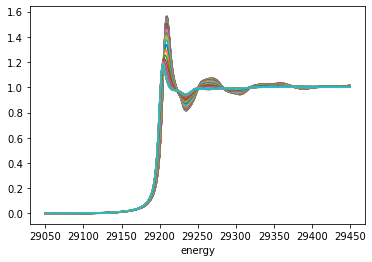

In [31]:
# Visualzie Interpolated Spectra
result.plot(legend=False)

In [32]:
# Inspect DataFrame containing interpoalted spectra
result

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.000514,0.000546,-0.001553,-0.000114,0.000161,-0.000634,-0.002264,0.000557,0.000471,-0.004015,...,0.000302,-0.000618,-0.000539,0.000912,-0.000228,-0.000048,0.000115,-0.000825,-0.000613,-0.000686
29050.25,0.000836,0.001078,-0.000574,0.001607,-0.000725,-0.001600,0.000261,-0.000129,-0.000802,-0.003397,...,-0.000618,-0.000628,-0.000764,0.000413,-0.000473,0.000735,0.000164,-0.000097,-0.000106,-0.001239
29050.50,-0.000393,0.000450,-0.000030,0.000103,-0.000079,-0.002177,0.000390,-0.000194,-0.001681,-0.000487,...,-0.000466,-0.000905,-0.001337,-0.000789,-0.000881,0.000574,-0.000406,0.000332,-0.001294,-0.001213
29050.75,-0.000199,-0.000202,0.000433,-0.000276,-0.000296,-0.001904,0.000583,-0.000590,-0.001930,0.000767,...,0.000348,-0.000216,-0.000914,-0.000775,-0.001991,-0.000688,-0.000106,-0.001530,-0.000715,-0.000416
29051.00,0.000003,-0.001819,0.000735,0.000142,-0.001724,-0.001119,0.001308,0.000510,-0.001820,-0.000523,...,0.000299,-0.000160,0.000784,-0.001603,-0.000906,-0.000479,-0.001425,-0.001164,-0.000775,-0.000447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,1.012277,1.013335,1.009653,1.014842,1.015270,1.015224,1.011951,1.011764,1.011140,1.011491,...,1.002876,1.004359,1.003260,1.004028,1.004321,1.003057,1.005272,1.004518,1.004796,1.003846
29449.25,1.012164,1.012147,1.010753,1.011636,1.013895,1.013531,1.012528,1.011951,1.011675,1.011676,...,1.003454,1.004181,1.005288,1.004124,1.005318,1.002567,1.004369,1.004092,1.002953,1.002302
29449.50,1.011065,1.011627,1.013635,1.014822,1.012387,1.011068,1.013511,1.013478,1.011310,1.011259,...,1.005267,1.003947,1.005989,1.002352,1.004374,1.003428,1.006031,1.003219,1.003607,1.004995


## 8c. Save the dataframe to a csv file 

In [33]:
# Define path and filename to save Normalized XANES:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'
result_name = 'NormXANES'

# Save Normalized XANES:
result.to_csv(os.path.join(output_dir,result_name + '.csv'), sep=',', header=True, index=True)

# 9. Linear Combination Fitting
## 9a. LCF using Sample Spectra (First/Intermediate/Last Spectra)

In [34]:
# Basis set made from three spectra in the sample dataset
basis1 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001']['Absorption Spectra']['mu Sample'] 
basis1.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

basis2 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031']['Absorption Spectra']['mu Sample']
basis2.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031'

basis3 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050']['Absorption Spectra']['mu Sample']
basis3.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050'

basis = [basis1, basis3]
#basis = [basis1, basis2, basis3]

In [35]:
# Load list of basis spectra into the experiment
my_exp.load_lcf_basis(basis, 'Fit 1')

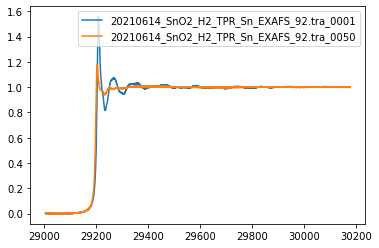

In [36]:
# Visualize basis sets to confirm normalized
for line in my_exp.analysis['LCF']['Fit 1']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()

In [37]:
# Fit the sample spectra
emin = 29150
emax = 29250

my_exp.fit_LCF('Fit 1', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=True)

In [38]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 1')
my_exp.analysis['LCF']['Fit 1']['Fit Summary']

,Name,Chi2,RedChi2,Variables,Amp1,Amp1-stdev,Amp2,Amp2-stdev,Sum Amp
0,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,1.891332e-30,4.887164e-33,1,1.000000,3.739282e-26,0.000000,3.739282e-26,1.0
1,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,3.926351e-03,1.014561e-05,1,1.000000,1.704809e-12,0.000000,1.704809e-12,1.0
2,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,2.581794e-03,6.671303e-06,1,0.998745,7.712494e-04,0.001255,7.712494e-04,1.0
3,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,3.198753e-03,8.244209e-06,1,0.999897,8.380296e-04,0.000103,8.380296e-04,1.0
4,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,4.330395e-03,1.118965e-05,1,0.995896,1.000163e-03,0.004104,1.000163e-03,1.0
5,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,3.836289e-03,9.912892e-06,1,0.996528,9.419164e-04,0.003472,9.419164e-04,1.0
6,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,3.829090e-03,9.894288e-06,1,0.995649,9.416394e-04,0.004351,9.416394e-04,1.0
7,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,2.725569e-03,7.042813e-06,1,0.997406,7.937854e-04,0.002594,7.937854e-04,1.0
8,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,3.937736e-03,1.017503e-05,1,0.992743,9.526914e-04,0.007257,9.526914e-04,1.0
9,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010,4.223389e-03,1.091315e-05,1,0.996026,9.872550e-04,0.003974,9.872550e-04,1.0


In [39]:
# Save Fit Report
LCFReport_name = 'First_Last_LCFReport'

my_exp.analysis['LCF']['Fit 1']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

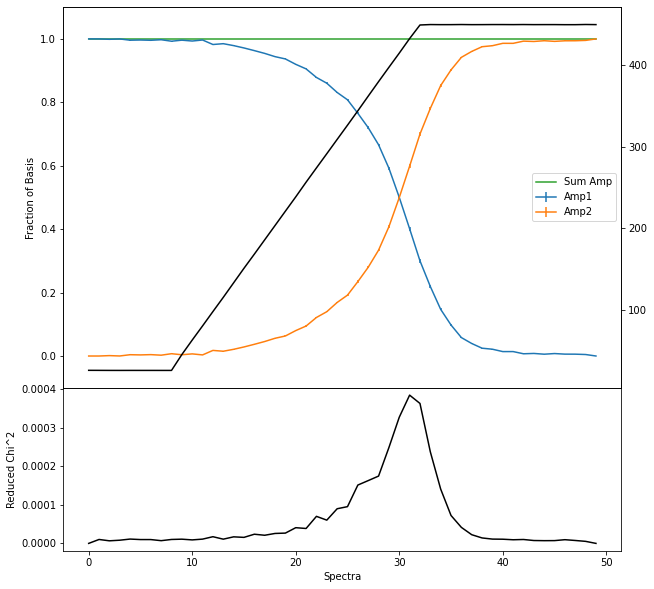

In [40]:
# Visualize Fit with process parameter

my_exp.plot_LCF_results('Fit 1', process_parameter = 'TR1 T [°C]')

In [41]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 1']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 1']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')
    

    for key2 in my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(29150,29250)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

interactive(children=(IntSlider(value=25, description='x', max=50, min=1), Output()), _dom_classes=('widget-in…

## 9b. LCF using Reference Spectra from Athena File
### NOTE: Project file must be calibrated and normalized

In [42]:
# Path to Athena File Containing Reference Spectra
Sn_Standards_path = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Adam Projects\Sievers - SnO2 Thermal Treatments\SnRefs.prj'

In [43]:
# Generate Larch Group from Athena File
Sn_refs = larch.io.read_athena(Sn_Standards_path, match=None, do_preedge=True, do_bkg=True, do_fft=True, use_hashkey=False)
Sn_refs

Group
SnFoil_merge
SnO_merge
d__Ref_SnO_merge
SnO2_merge
d__Ref_SnO2_merge


In [44]:
# Set E0 and normalize references (do_preedge does nothing...)
Sn_K_Edge = 29200
mean_e0 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001']['Absorption Spectra']['mu Sample'].e0

Sn_refs.SnFoil_merge.e0 = Sn_K_Edge
Sn_refs.SnO_merge.e0 = mean_e0
Sn_refs.SnO2_merge.e0 = mean_e0


pre1 = -200
pre2 = -100
norm1 = 75
norm2 = 1000
nnorm = 2
make_flat = True

larch.xafs.pre_edge(Sn_refs.SnFoil_merge.energy, mu = Sn_refs.SnFoil_merge.mu, 
                    group = Sn_refs.SnFoil_merge, e0 = Sn_refs.SnFoil_merge.e0, 
                    pre1 = pre1, pre2 = pre2, 
                    norm1 = norm1, norm2 = norm2, 
                    nnorm = nnorm, make_flat = make_flat)

larch.xafs.pre_edge(Sn_refs.SnO_merge.energy, mu = Sn_refs.SnO_merge.mu, 
                    group = Sn_refs.SnO_merge, e0 = Sn_refs.SnO_merge.e0, 
                    pre1 = pre1, pre2 = pre2, 
                    norm1 = norm1, norm2 = norm2, 
                    nnorm = nnorm, make_flat = make_flat)

larch.xafs.pre_edge(Sn_refs.SnO2_merge.energy, mu = Sn_refs.SnO2_merge.mu, 
                    group = Sn_refs.SnO2_merge, e0 = Sn_refs.SnO2_merge.e0, 
                    pre1 = pre1, pre2 = pre2, 
                    norm1 = norm1, norm2 = norm2, 
                    nnorm = nnorm, make_flat = make_flat)

In [45]:
# Generate List of Basis Spectra
basis1 = Sn_refs.SnFoil_merge
basis1.name = 'Sn Foil'

basis2 = Sn_refs.SnO_merge
basis2.name = 'SnO'

basis3 = Sn_refs.SnO2_merge
basis3.name = 'SnO2'



basis = [basis1, basis2, basis3]

In [46]:
my_exp.load_lcf_basis(basis, 'Fit 2')

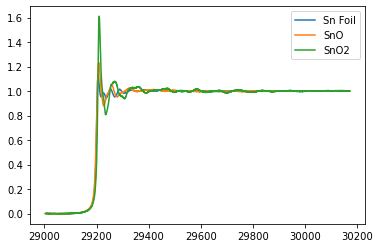

In [47]:
for line in my_exp.analysis['LCF']['Fit 2']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()

In [48]:
# Fit the sample spectra
emin = 29150
emax = 29250

my_exp.fit_LCF('Fit 2', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=True)

In [49]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 2')
my_exp.analysis['LCF']['Fit 2']['Fit Summary']

,Name,Chi2,RedChi2,Variables,Amp1,Amp1-stdev,Amp2,Amp2-stdev,Amp3,Amp3-stdev,Sum Amp
0,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,0.124643,0.000323,2,0.000000e+00,1.332461e-11,0.171248,0.006778,0.828752,0.006778,1.000000
1,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,0.110520,0.000286,2,0.000000e+00,1.069924e-11,0.175826,0.006077,0.824174,0.006077,1.000000
2,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,0.123990,0.000321,2,0.000000e+00,1.268514e-11,0.178103,0.006395,0.821897,0.006395,1.000000
3,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,0.134069,0.000346,2,7.476281e-11,7.741525e-03,0.166210,0.020354,0.833790,0.405091,1.000000
4,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,0.155109,0.000402,2,0.000000e+00,1.297308e-11,0.189495,0.007643,0.810505,0.007643,1.000000
5,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,0.140784,0.000365,2,0.000000e+00,1.199814e-11,0.192720,0.007096,0.807280,0.007096,1.000000
6,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,0.149068,0.000386,2,0.000000e+00,1.399103e-11,0.202200,0.007377,0.797800,0.007377,1.000000
7,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,0.134951,0.000350,2,0.000000e+00,6.490685e-12,0.196709,0.006535,0.803291,0.006535,1.000000
8,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,0.147876,0.000383,2,0.000000e+00,1.283644e-11,0.195940,0.007427,0.804060,0.007427,1.000000
9,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010,0.114558,0.000297,2,1.829024e-06,4.791860e-03,0.169449,0.018870,0.830549,0.014408,1.000000


In [50]:
# Save Fit Report
LCFReport_name = 'Bulk_Standards_LCFReport'

my_exp.analysis['LCF']['Fit 2']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

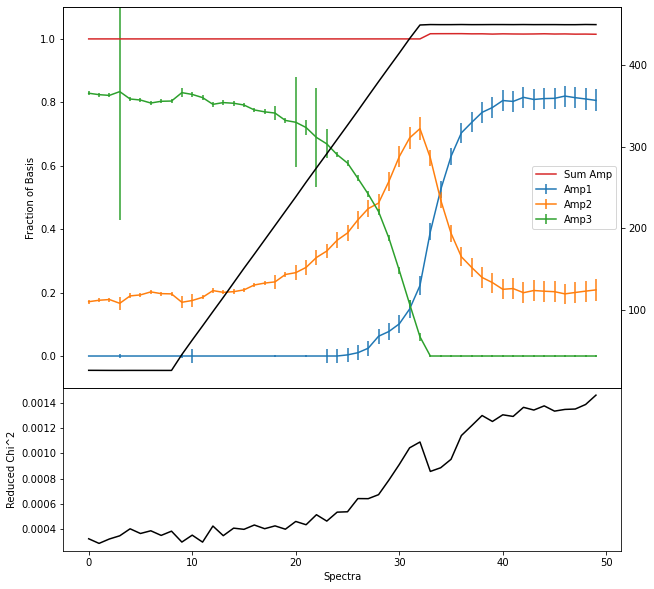

In [51]:
my_exp.plot_LCF_results('Fit 2', process_parameter = 'TR1 T [°C]')

In [52]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 2']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 2']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 2']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')

    for key2 in my_exp.analysis['LCF']['Fit 2']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 2']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(29150,29250)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

interactive(children=(IntSlider(value=25, description='x', max=50, min=1), Output()), _dom_classes=('widget-in…

## 9c. LCF using Sample and Reference Spectra (First/SnO/Last Spectra)

In [53]:
# Generate List of Basis Spectra
basis1 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001']['Absorption Spectra']['mu Sample'] 
basis1.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

basis2 = Sn_refs.SnO_merge
basis2.name = 'SnO'

basis3 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050']['Absorption Spectra']['mu Sample']
basis3.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050'


basis = [basis1, basis2, basis3]

In [54]:
# Load list of basis spectra into the experiment
my_exp.load_lcf_basis(basis, 'Fit 3')

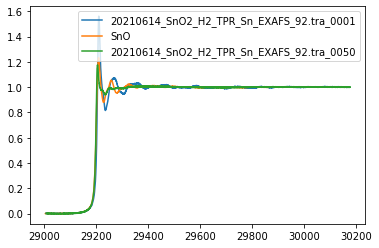

In [55]:
# Visualize basis sets to confirm normalized
for line in my_exp.analysis['LCF']['Fit 3']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()

In [56]:
# Fit the sample spectra
emin = 29150
emax = 29250

my_exp.fit_LCF('Fit 3', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=False)

In [57]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 3')
my_exp.analysis['LCF']['Fit 3']['Fit Summary']

,Name,Chi2,RedChi2,Variables,Amp1,Amp1-stdev,Amp2,Amp2-stdev,Amp3,Amp3-stdev,Sum Amp
0,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,1.891332e-30,4.912552e-33,3,1.000000,6.715515e-18,0.000000e+00,8.500994e-19,0.000000e+00,6.522573e-18,1.000000
1,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,1.652022e-01,4.290966e-04,3,0.994431,8.578551e-03,3.217327e-02,9.062299e-03,0.000000e+00,1.603341e-11,1.026604
2,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,3.478315e-03,9.034586e-06,3,0.996677,1.754912e-03,5.128643e-03,5.014104e-03,3.991386e-06,2.981756e-03,1.001810
3,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,1.081689e-02,2.802302e-05,3,0.997304,2.188365e-03,8.636352e-03,2.315965e-03,0.000000e+00,4.323087e-12,1.005940
4,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,4.076091e-03,1.058725e-05,3,0.995014,1.894230e-03,3.244391e-03,5.424781e-03,2.832497e-03,3.920038e-03,1.001091
5,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,4.691422e-02,1.218551e-04,3,0.988725,4.575268e-03,2.619305e-02,4.845467e-03,0.000000e+00,8.936052e-12,1.014918
6,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,3.513247e-02,9.125317e-05,3,0.988190,3.962241e-03,2.512475e-02,4.196153e-03,0.000000e+00,7.733678e-12,1.013315
7,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,2.596109e-03,6.743141e-06,3,0.994368,1.514007e-03,6.023036e-03,4.333768e-03,3.315052e-07,2.663412e-03,1.000392
8,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,2.788318e-02,7.242385e-05,3,0.985104,3.523804e-03,2.543215e-02,3.732874e-03,0.000000e+00,6.933362e-12,1.010536
9,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010,1.723847e-01,4.477525e-04,3,0.982517,8.766304e-03,4.485624e-02,9.272288e-03,0.000000e+00,1.635882e-11,1.027374


In [58]:
# Save Fit Report
LCFReport_name = 'First_SnO_Last_LCFReport'

my_exp.analysis['LCF']['Fit 3']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

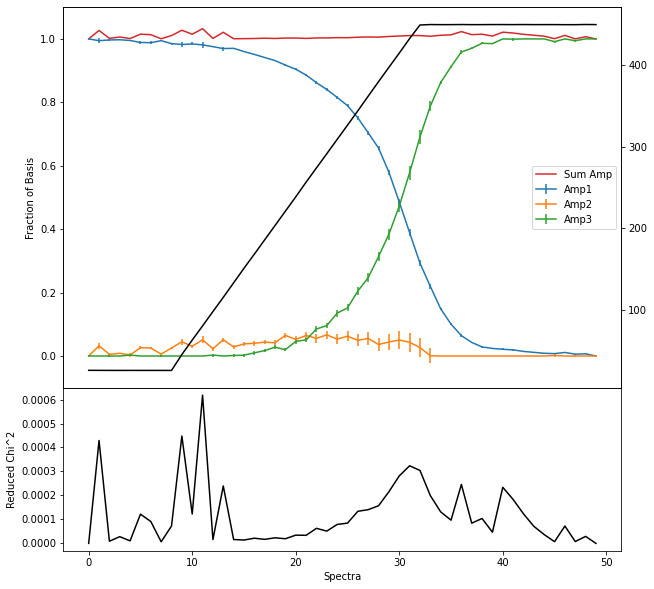

In [59]:
my_exp.plot_LCF_results('Fit 3', process_parameter = 'TR1 T [°C]')

In [60]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 3']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 3']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 3']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')


    for key2 in my_exp.analysis['LCF']['Fit 3']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 3']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(29150,29250)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

interactive(children=(IntSlider(value=25, description='x', max=50, min=1), Output()), _dom_classes=('widget-in…

In [61]:
elapsed = time.time() - t1
print(f'Elapsed time: {elapsed:.2f} s')

Elapsed time: 18.59 s
